# Analyze open data sets with pandas DataFrames

In this notebook, you'll learn how to use open data from the data sets on the Data Science Experience home page in a Python notebook. You will load, clean, and explore the data with pandas DataFrames. 

Some familiarity with Python is recommended.

The data sets for this notebook are from the World Development Indicators (WDI) data set. The WDI data set is a statistical benchmark that helps measure the progress of human development. The WDI data set draws on data from the World Bank and more than 30 partners. You'll look at seven key development variables, sorted by country and year.

## Learning goals

1. Access data from the Data Science Experience home page.
1. Merge multiple data sets in pandas DataFrames.
1. Structure data for analysis.
1. Generate summary statistics.
1. Create charts with custom formatting.
1. Show relationships between all variables.

In [14]:
# Import Some Modules
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')



# inline plots
%matplotlib inline

## Table of contents
The main parts of this notebook are:
1. [Load data into DataFrames](#load)
    1. [Load the first data set](#first)
    1. [Load another data set](#loadsecond)
    1. [Join the DataFrames](#joindataframes)
    1. [Add more data](#loadmore)
    1. [Create a MultiIndex](#multiindex)
1. [Check the data](#check)
1. [Analyze the data](#analysis)
    1. [Create scatter plots with matplotlib](#matplotlib)
    1. [Create a scatter plot matrix](#matrix)
1. [Next steps](#summary)

<a id="load"></a>
## 1. Load data into DataFrames

To load the data, you obtain access key links and put them into the code to create pandas DataFrames. You will load data into multiple DataFrames and then merge the DataFrames and create a MultiIndex to structure the data for analysis.

<a id="first"></a>
### A. Load the first data set

The first data set that you'll load contains life expectancy data.

To get your access key link and load the first data set:
1. Find the data set and get the access key link:
    1. On the Data Science Experience home page, search for "life expectancy."
    1. Click the card with the title [Life expectancy at birth by country in total years](https://apsportal.ibm.com/exchange/public/entry/view/f15be429051727172e0d0c226e2ce895).
    1. Click the link button.
    1. Hover above the link button next to the access key to display the link.
    1. Double-click the link to select it, copy the link, and click **Close**.
    1. Insert the access key link and run the cell to load the data:
    1. In the cell below, replace the **LINK-TO-DATA** string in the `read_csv()` method with the link.
    1. Run the following cell to import the pandas and numpy libraries, rename and load three columns of the data into the DataFrame, and show the first five rows of data.

In [2]:
# life expectancy at birth in years
life = pd.read_csv("UNdata_life_expectancy_at_birth_total_years.csv",usecols=['Country or Area','Year','Value'])
life.columns = ['country','year','life']
life.head(5)

,country,year,life
0,Afghanistan,2012,60.509122
1,Afghanistan,2011,60.065366
2,Afghanistan,2010,59.600098
3,Afghanistan,2009,59.112341
4,Afghanistan,2008,58.607098


<a id="loadsecond"></a>
### B. Load another data set

The life expectancy figures are more meaningful if you combine them with other data sets. Get an access key link for this data set: [Total population by country](https://apsportal.ibm.com/exchange/public/entry/view/889ca053a19986a4445839358a91963e). Paste your link in the following cell, which loads three columns of the data and prints the number of countries in each data set: 

In [3]:
# population
population = pd.read_csv("UNdata_population_total.csv",usecols=['Country or Area', 'Year','Value'])
population.columns = ['country', 'year','population']
population.head(5)

,country,year,population
0,Afghanistan,2013,30551674.0
1,Afghanistan,2012,29824536.0
2,Afghanistan,2011,29105480.0
3,Afghanistan,2010,28397812.0
4,Afghanistan,2009,27708187.0


In [4]:
print "Nr of countries in life:", np.size(np.unique(life['country']))
print "Nr of countries in population:", np.size(np.unique(population['country']))

Nr of countries in life: 246
Nr of countries in population: 245


<a id="joindataframes"></a>
### C. Join DataFrames

As you can see, the two data sets don't fit together perfectly: one contains more countries than the other. When you join two DataFrames, it's common to introduce nulls or NaNs (a value that's not a number when a number is expected) into the resulting DataFrame. 

Use the pandas `merge` function to make the data fit together. In the following cell, the `how='outer'` option specifies to keep the data from the `life` and `population` columns. The `on=['country','year']` option specifies which columns to merge on. To view the options for the `merge` function, see [Merge, join, and concatentate](http://pandas.pydata.org/pandas-docs/stable/merging.html). 

In [5]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11977 entries, 0 to 11976
Data columns (total 3 columns):
country    11977 non-null object
year       11977 non-null object
life       11969 non-null float64
dtypes: float64(1), object(2)
memory usage: 280.8+ KB


In [6]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13121 entries, 0 to 13120
Data columns (total 3 columns):
country       13121 non-null object
year          13121 non-null int64
population    13091 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 307.6+ KB


### Masking and Data Scrubbing

In [7]:
life = life[life.year.apply(lambda x: x.isdigit())]

In [8]:
life['year'] = life['year'].astype(float)
population['year'] = population['year'].astype(float)

In [9]:
df = pd.merge(life, population, how='outer', sort=True, on=['country','year'])

In [10]:
# Check integrity of data
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13124 entries, 0 to 13123
Data columns (total 4 columns):
country       13124 non-null object
year          13124 non-null float64
life          11969 non-null float64
population    13091 non-null float64
dtypes: float64(3), object(1)
memory usage: 512.7+ KB


country          0
year             0
life          1155
population      33
dtype: int64

In [11]:
df.head()

,country,year,life,population
0,Afghanistan,1960.0,31.580049,8774440.0
1,Afghanistan,1961.0,32.095976,8953544.0
2,Afghanistan,1962.0,32.611878,9141783.0
3,Afghanistan,1963.0,33.127317,9339507.0
4,Afghanistan,1964.0,33.641244,9547131.0


In [12]:
filter_countries = ["World", "High income", "Low & middle income", "Middle income",\
                    "Lower middle income", "Upper middle income","Low income", "East Asia & Pacific (all income levels)",\
                    "East Asia & Pacific (developing only)", "South Asia", "OECD members", "High income: OECD",\
                    "Sub-Saharan Africa (all income levels)", "Sub-Saharan Africa (developing only)",\
                    "Europe & Central Asia (all income levels)", "Least developed countries: UN classification",\
                    "Heavily indebted poor countries (HIPC)", "Latin America & Caribbean (all income levels)",\
                    "Latin America & Caribbean (developing only)", "European Union","Middle East & North Africa (all income levels)",\
                    "Middle East & North Africa (developing only)", "Euro area", "Arab World", "Europe & Central Asia (developing only)",\
                    "High income: nonOECD", "North America"
                    ]

df = df[df['country'].apply(lambda x: x not in filter_countries)]
df.sort_values("population",ascending = False).reset_index().head(10)

,index,country,year,life,population
0,2321,China,2013.0,NaN,1.357380e+09
1,2320,China,2012.0,75.199512,1.350695e+09
2,2319,China,2011.0,75.042000,1.344130e+09
3,2318,China,2010.0,74.885024,1.337705e+09
4,2317,China,2009.0,74.731634,1.331260e+09
5,2316,China,2008.0,74.579829,1.324655e+09
6,2315,China,2007.0,74.424073,1.317885e+09
7,2314,China,2006.0,74.256317,1.311020e+09
8,2313,China,2005.0,74.053902,1.303720e+09
9,2312,China,2004.0,73.793707,1.296075e+09


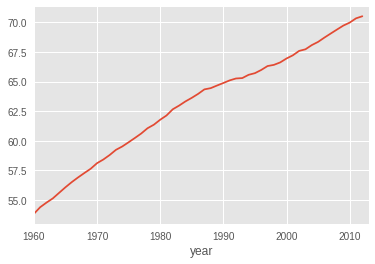

In [31]:
df.groupby('year').mean()['life'].plot()

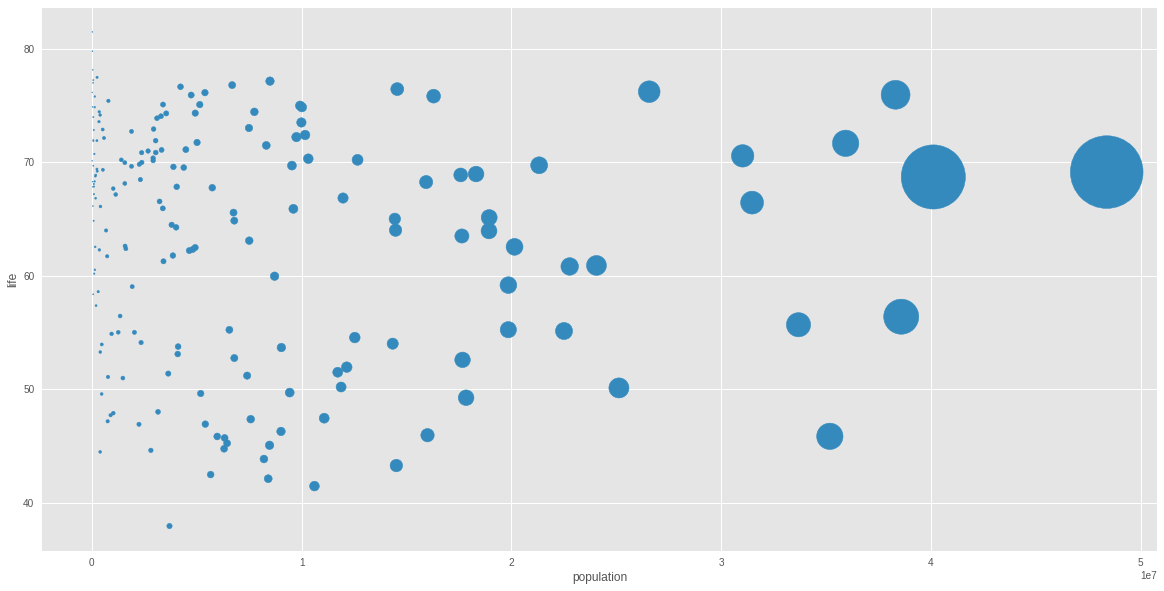

In [30]:
avg_df = df.groupby('country').mean()[["life", "population"]].sort_values("population",ascending = False)
avg_df_trim = avg_df[avg_df.population < avg_df.quantile(0.9)[1]]

avg_df_trim.plot.scatter(x='population', y='life', s=avg_df['population']*0.000005, figsize=(20,10));

<a id="loadmore"></a>
### D. Add more data 

Add more data about development to the DataFrame. For each data set, you'll include the country and year columns, plus a column that contains the key development variable for that data set. For the employment data set, you'll derive a column from three original columns.

For each of these data sets, get an access key link for the data and paste the link into the appropriate section of the following cell:
* [Population below national poverty line, total, percentage](https://apsportal.ibm.com/exchange/public/entry/view/3a42de810e682d5a83e76fda9fea2bbe)
* [Primary school completion rate % of relevant age group by country](https://apsportal.ibm.com/exchange/public/entry/view/97fc6c420265012ae9b5e9439b9ee293)
* [Total employment, by economic activity (Thousands)](https://apsportal.ibm.com/exchange/public/entry/view/21c789ae4cfadf52f1bb14b5d4a0b99c)
* [Births attended by skilled health staff (% of total) by country](https://apsportal.ibm.com/exchange/public/entry/view/87160cc8374805cb3b07dff4b4f9223e)
* [Measles immunization % children 12-23 months by country](https://apsportal.ibm.com/exchange/public/entry/view/752e36ea889eca360e989baa785c2a5e)

In [32]:
def clean_year(df):
    if df.year.dtype not in (np.int64, np.float64):
        df = df[df.year.apply(lambda x: x.isdigit())]
    df['year'] = df['year'].astype(float)
    return df

In [33]:
# Population below national poverty line, total, percentage
poverty = pd.read_csv("UNdata_Export_20151013_112943678-poverty_clean.csv",usecols=['Country or Area', 'Year','Value'])
poverty.columns = ['country', 'year','poverty']

# Primary school completion rate % of relevant age group by country
school = pd.read_csv("UNdata_Primary_completion_rate_total (%_relevant_age_group.csv",usecols=['Country or Area', 'Year','Value'])
school.columns = ['country', 'year','school']

# Total employment, by economic activity (Thousands)
employmentin = pd.read_csv("Total employment, by economic activity .csv",usecols=['Country or Area', 'Year','Value','Sex','Subclassification'])
employment = employmentin.loc[(employmentin.Sex=='Total men and women')&
                              (employmentin.Subclassification=='Total.')]
employment = employment.drop('Sex', 1)
employment = employment.drop('Subclassification', 1)
employment.columns = ['country', 'year','employment']

# Births attended by skilled health staff (% of total) by country
births = pd.read_csv("Births attended by skilled health staff (% of total).csv",usecols=['Country or Area', 'Year','Value'])
births.columns = ['country', 'year','births']

# Measles immunization % children 12-23 months by country
measles = pd.read_csv("UNdata_Immunization_measles_%_children_12to23_months.csv",usecols=['Country or Area', 'Year','Value'])
measles.columns = ['country', 'year','measles']


merge_lists = [poverty, school, employment, births, measles]
merge_lists = map(clean_year, merge_lists)

for data in merge_lists:
    print data.info() 
    print ""  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 3 columns):
country    623 non-null object
year       623 non-null float64
poverty    623 non-null float64
dtypes: float64(2), object(1)
memory usage: 19.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5078 entries, 0 to 5077
Data columns (total 3 columns):
country    5078 non-null object
year       5078 non-null float64
school     5078 non-null float64
dtypes: float64(2), object(1)
memory usage: 158.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2909 entries, 0 to 99985
Data columns (total 3 columns):
country       2909 non-null object
year          2909 non-null float64
employment    2909 non-null float64
dtypes: float64(2), object(1)
memory usage: 90.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 3 columns):
country    1468 non-null object
year       1468 non-null float64
births     1467 non-null float64
d

/home/justin/Envs/data_sci/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
for data in merge_lists:
    df = pd.merge(df, data, how='left', sort=True, on=['country','year'])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11894 entries, 0 to 11893
Data columns (total 9 columns):
country       11894 non-null object
year          11894 non-null float64
life          10765 non-null float64
population    11861 non-null float64
poverty       572 non-null float64
school        4336 non-null float64
employment    2459 non-null float64
births        1468 non-null float64
measles       6114 non-null float64
dtypes: float64(8), object(1)
memory usage: 929.2+ KB


In [75]:
avg_df = df.groupby('country').mean().sort_values("population",ascending = False)
avg_df.head()

,year,life,population,poverty,school,employment,births,measles
country,,,,,,,,
China,1986.500000,66.247287,1.055207e+09,5.300000,98.367526,504715.870968,95.172727,87.645161
India,1986.500000,56.111806,8.224687e+08,33.550000,73.182838,NaN,43.580000,56.482759
United States,1986.500000,74.271993,2.460156e+08,NaN,98.460065,NaN,99.100000,91.617647
Indonesia,1988.393443,61.209935,1.728327e+08,16.242105,87.232905,80594.417595,60.028000,67.026316
Russian Federation,1987.952381,67.269271,1.404060e+08,15.884615,92.921962,67566.517857,99.258065,94.482759


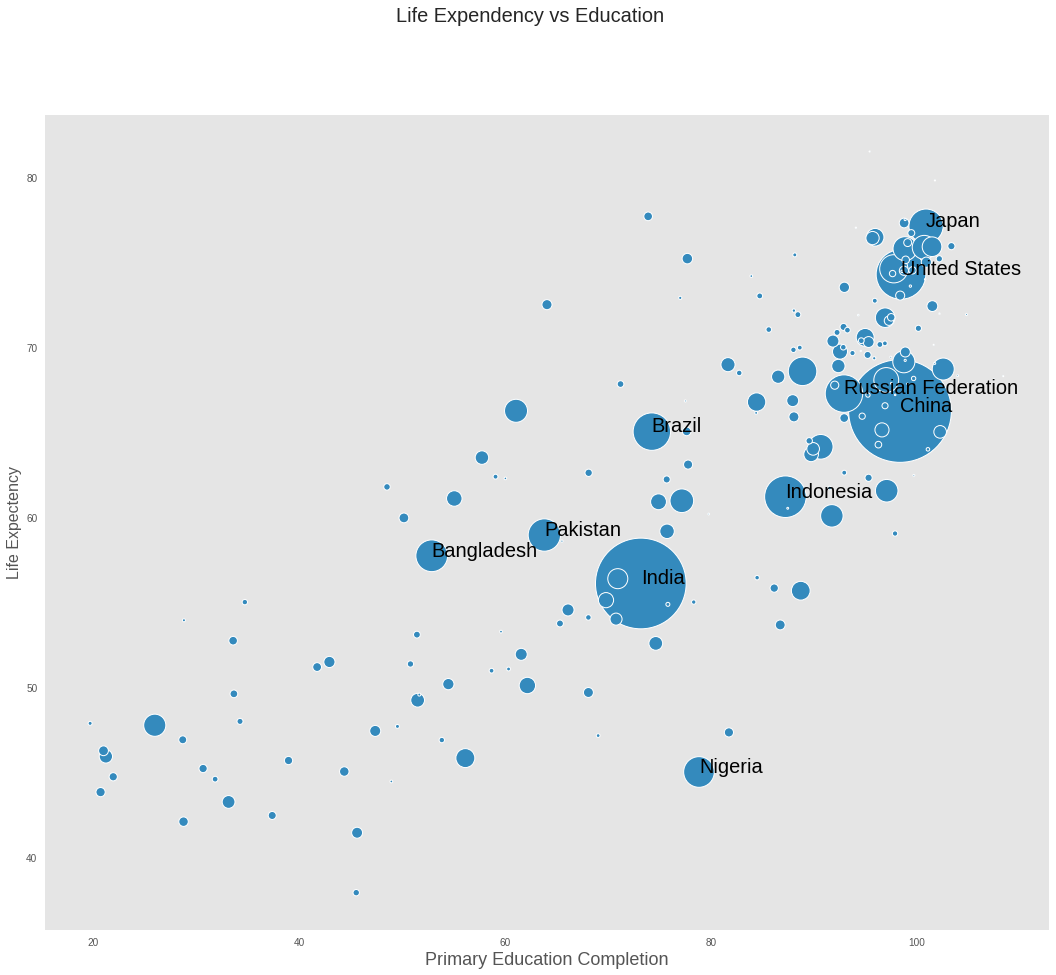

In [114]:
avg_df_trim = avg_df[avg_df.school < avg_df.school.quantile(0.99)]

fig, ax = plt.subplots()
avg_df_trim.plot.scatter(x='school', y='life', s=avg_df['population']*0.00001,
                         grid = None,
                         figsize=(18,15), edgecolors='white', lw= 1, ax=ax)


label_threshold = avg_df_trim["population"].quantile(0.95)
for i, txt in enumerate(avg_df_trim.index):
    if avg_df_trim.loc[txt].population > label_threshold:
        ax.annotate(txt, (avg_df_trim.school[i],avg_df_trim.life[i]), size = 20, color = "Black")
    
plt.grid(False)
plt.suptitle('Life Expendency vs Education', fontsize=20)
plt.xlabel('Primary Education Completion', fontsize=18)
plt.ylabel('Life Expectency', fontsize=16)

plt.show()

<a id="multiindex"></a>
### E. Create a MultiIndex

You structure the data for analysis by creating a pandas MultiIndex. A MultiIndex is a hierarchical index that groups the data so that you can easily summarize it.
For example, by grouping by country and then by year, you can plot the average value per country for all years instead of plotting a value for every country for every year.

Run this cell to create a MultiIndex on the country and the year:

In [112]:
df2 = df.set_index(['country','year'])

df2[0:30]

life  population  poverty    school  employment  \
country     year                                                           
Afghanistan 1960.0  31.580049   8774440.0      NaN       NaN         NaN   
            1961.0  32.095976   8953544.0      NaN       NaN         NaN   
            1962.0  32.611878   9141783.0      NaN       NaN         NaN   
            1963.0  33.127317   9339507.0      NaN       NaN         NaN   
            1964.0  33.641244   9547131.0      NaN       NaN         NaN   
            1965.0  34.153683   9765015.0      NaN       NaN         NaN   
            1966.0  34.663122   9990125.0      NaN       NaN         NaN   
            1967.0  35.170073  10221902.0      NaN       NaN         NaN   
            1968.0  35.672024  10465770.0      NaN       NaN         NaN   
            1969.0  36.169976  10729191.0      NaN       NaN         NaN   
            1970.0  36.659439  11015621.0      NaN       NaN         NaN   
            1971.0  37.139415  11323446.0      NaN       NaN         NaN   
            1972.0  37.608878  11644377.0      NaN       NaN         NaN   
            1973.0  38.069341  11966352.0      NaN       NaN         NaN   
            1974.0  38.523293  12273589.0      NaN  16.60984         NaN   
            1975.0  38.970268  12551790.0      NaN       NaN         NaN   
            1976.0  39.410732  12806810.0      NaN       NaN         NaN   
            1977.0  39.847707  13034460.0      NaN  17.18067         NaN   
            1978.0  40.290683  13199597.0      NaN  18.84355         NaN   
            1979.0  40.748171  13257128.0      NaN       NaN         NaN   
            1980.0  41.233659  13180431.0      NaN  26.34265         NaN   
            1981.0  41.760634  12963788.0      NaN  32.73786         NaN   
            1982.0  42.335610  12634494.0      NaN  13.29607         NaN   
            1983.0  42.963049  12241928.0      NaN       NaN         NaN   
            1984.0  43.644488  11854205.0      NaN  18.12719         NaN   
            1985.0  44.379902  11528977.0      NaN  18.92117         NaN   
            1986.0  45.168805  11262439.0      NaN       NaN         NaN   
            1987.0  45.997220  11063107.0      NaN       NaN         NaN   
            1988.0  46.850146  11013345.0      NaN       NaN         NaN   
            1989.0  47.711585  11215323.0      NaN       NaN         NaN   

                    births  measles  
country     year                     
Afghanistan 1960.0     NaN      NaN  
            1961.0     NaN      NaN  
            1962.0     NaN      NaN  
            1963.0     NaN      NaN  
            1964.0     NaN      NaN  
            1965.0     NaN      NaN  
            1966.0     NaN      NaN  
            1967.0     NaN      NaN  
            1968.0     NaN      NaN  
            1969.0     NaN      NaN  
            1970.0     NaN      NaN  
            1971.0     NaN      NaN  
            1972.0     NaN      NaN  
            1973.0     NaN      NaN  
            1974.0     NaN      NaN  
            1975.0     NaN      NaN  
            1976.0     NaN      NaN  
            1977.0     NaN      NaN  
            1978.0     NaN      NaN  
            1979.0     NaN      NaN  
            1980.0     NaN     11.0  
            1981.0     NaN      NaN  
            1982.0     NaN      8.0  
            1983.0     NaN      9.0  
            1984.0     NaN     14.0  
            1985.0     NaN     14.0  
            1986.0     NaN     14.0  
            1987.0     NaN     31.0  
            1988.0     NaN     34.0  
            1989.0     NaN     22.0

You can see that for the 1980s, the only data for Afghanistan is about measles immunizations. 

If you are curious about other variables, you can add more WDI data sets from the Data Science Experience home page to this DataFrame. Not all WDI data is properly formatted. You might need to clean the data before you add it. You can reuse the code samples that you just ran. Make sure that you keep checking the results by running commands like `df2[0:10]` on your tables when you load or change them. 

<a id="check"></a>
## 2. Check the data 
You can check the data with the [`describe()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html), which calculates basic summary statistics for each of the columns in the DataFrame (except the country and year columns). 

Run the following cell to show the number of values (count), the mean, the standard deviation (std), the minimum value, three percentiles, and the maximum value for the columns:  

In [113]:
df2.describe()

,life,population,poverty,school,employment,births,measles
count,10765.000000,1.186100e+04,572.000000,4336.000000,2459.000000,1468.000000,6114.000000
mean,63.331311,2.345675e+07,30.753583,78.339240,15804.941191,84.481119,76.641065
std,11.451254,9.652433e+07,17.907069,26.577424,62034.137784,23.845454,22.637430
min,19.504927,4.279000e+03,1.700000,1.522030,1.038000,5.000000,1.000000
25%,55.041220,5.898620e+05,16.900000,61.292875,1092.050000,76.300000,65.000000
50%,66.506268,4.285526e+06,26.000000,89.434066,3646.300000,98.100000,84.000000
75%,72.001049,1.309100e+07,44.525000,97.956620,9470.961500,99.700000,94.000000
max,83.480488,1.357380e+09,96.000000,193.263340,737400.000000,100.000000,99.000000


<a id="analysis"></a>
## 3. Analyze the data
Now that you have enough sample data to work with, you can find the correlation between different variables. You'll create scatter plots that each compare two variables. 

<a id="matplotlib"></a>
### A. Create scatter plots with matplotlib

Run the following cell to create two scatter plots that relate the values of population and amount of schooling to life expectancy. Use `matplotlib` library commands to create charts with custom font, figure size, and colors. 

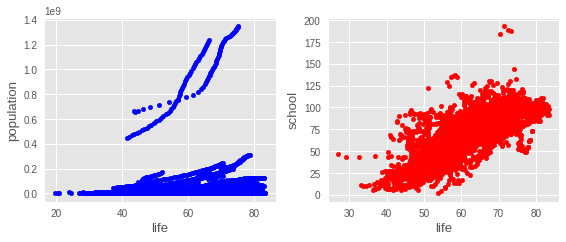

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size']=11
plt.rcParams['figure.figsize']=[8.0, 3.5]
fig, axes=plt.subplots(nrows=1, ncols=2)
df2.plot(kind='scatter', x='life', y='population', ax=axes[0], color='Blue');
df2.plot(kind='scatter', x='life', y='school', ax=axes[1], color='Red');
plt.tight_layout()

The chart on the left shows that increased life expectancy leads to higher population. Each dot represents a value for one country for one year.

The chart on the right shows that the life expectancy increases with the percentage of school completion. Each dot represents the average value for one country for all years that have data. Notice that the percentage goes up to 200% instead of 100%. This might indicate a problem with the data. You can remove the outliers and keep only the values less than 100% with a command like: `df2[df2.school>100]=float('NaN')`. Even better, you can check where these values in the original data came from. Otherwise, a range like this might indicate an error in your code. In this case, however, the values are correct because of the way the school completion data was calculated: read the description of [Primary school completion rate % of relevant age group by country](https://apsportal.ibm.com/exchange/public/entry/view/97fc6c420265012ae9b5e9439b9ee293). Percentages higher than 100 indicate that older people are finishing primary school.

<a id="matrix"></a>
### B. Create a scatter plot matrix

You can create charts that show the relationships between all variables with a scatter plot matrix. Each dot represents the average value for one country for all years that have data. 

Run the following cell to create scatter plots and histograms from the DataFrame with the `scatter_matrix()` method. Because the data does not cover the same years, group the data by country (with some loss of data). Many variables are percentages, so convert the employment figures to percentages as well. Drop the `population` column, because you don't need it anymore. 

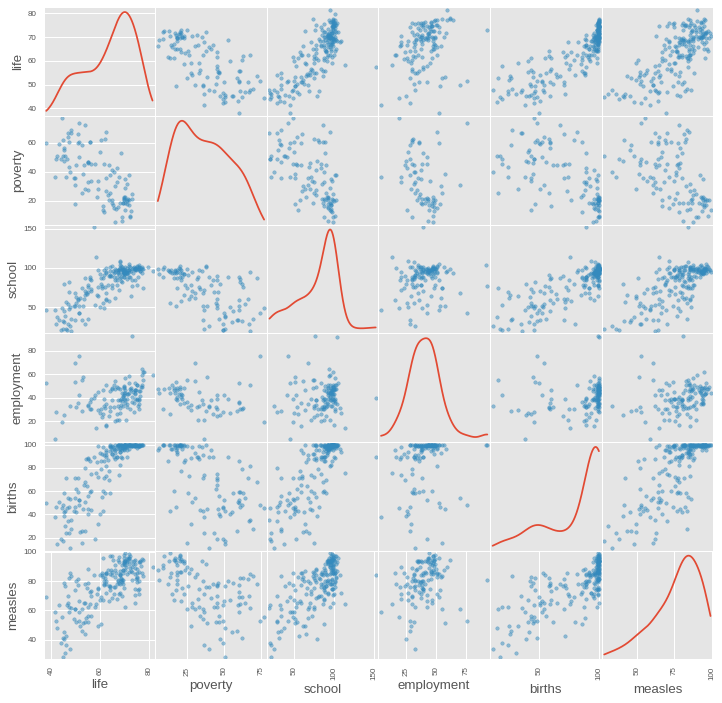

In [116]:
from pandas.tools.plotting import scatter_matrix

# group by country
grouped = df2.groupby(level=0)
dfgroup = grouped.mean()

# employment in % of total population
dfgroup['employment']=(dfgroup['employment']*1000.)/dfgroup['population']*100
dfgroup=dfgroup.drop('population',1)

scatter_matrix(dfgroup,figsize=(12, 12), diagonal='kde');